# Analyzing Global Happiness: Exploring the Impact of Economic and Social Factors on Happiness
Abby Scarry and Nicole Davis

[View Project Website](https://ascarry.github.io/)

## **Introduction**

Our project explores some of the many factors that influence happiness globally and aims to predict happiness levels using key indicators. To measure happiness, we rely on Happiness Scores, a universal metric reflecting the quality of life and satisfaction of citizens reported by countries worldwide.

There is a broad range of factors that impact the lives of individuals within a country, but for this project, we focus on social and economic. While these factors often intersect, we classify the variables into just two categories: social and economic. Social factors focus on human-centric aspects related to well-being, such as health and education, while economic factors pertain to material well-being and resources, such as income and infrastructure.

By identifying and understanding which key factors have the greatest influence on happiness scores, we can prioritize efforts to enhance quality of life and address disparities between different countries.

###**Datasets**

We selected three datasets for this analysis:

[The first dataset](https://worldhappiness.report/ed/2024/#appendices-and-data) comes from the World Happiness Report, which contains data on happiness scores (life ladders) and contributing factors across various countries over time. Factors include log GDP per capita, social support, life expectancy, freedom of choice, and more. This dataset serves as our  foundational source for examining the relationship between different factors and reported happiness levels.

[The second dataset](https://www.kaggle.com/datasets/tarktunataalt/2023-global-country-development-and-prosperity-index), referred to as the Global Country Development & Prosperity Index, comes from Kaggle, where the data is pulled from the 2023 Legatum Prosperity Index. This dataset complements our first by including broader indicators such as education quality, health quality, economic quality, and other development data. Combining this dataset with the World Happiness Report allows us to conduct a comprehensive analysis of how different factors are associated with happiness scores globally.

[The third dataset ](https://ourworldindata.org/grapher/world-regions-according-to-the-world-bank) was pulled from Our World in Data, which categorizes countries into regions and sub-regions based on World Bank classifications. This allows us to group and analyze happiness data and other factors regionally and sub-regionally, enabling us to look more closely at trends and disparities in specific areas.

###**Variables**

For clarity and reference, below are brief definitions of the main variables used in our analysis, categorized as either social or economic factors:

Country: Name of the country.

Happiness Score: National average rating of life satisfaction on a scale from 0 (worst) to 10 (best). <br />

<br />

**Economic Variables:**

Log GDP per Capita: GDP per capita (PPP) in constant international dollars, reflecting economic prosperity.

Economic Quality: Macroeconomic stability and employment quality.

Market Access & Infrastructure: Ease of trade and quality of infrastructure.

Living Conditions: Standard of living and access to basic services.

Governance Quality: Quality of democracy, rule of law, and government effectiveness.

Investment Environment: Conditions for private investment and credit access.

Enterprise Conditions: Business environment and market competition.<br />

<br />

**Social Variables:**

Social Support: Average responses on whether or not individuals have someone they can rely on in times of trouble.

Life Expectancy: The average number of years a person is expected to live in good health.

Freedom of Choice: Average satisfaction with freedom to make life choices.

Generosity:  Residual of responses on donating to charity, adjusted for GDP per capita.

Corruption Perception: Average perception of widespread corruption in government/business.

Safety & Security: Freedom from conflict, terrorism, and crime.

Personal Freedom: Rights to speech, assembly, and individual autonomy.

Social Capital: Strength of personal relationships and civic engagement.

Health Quality: Population health and healthcare access.

Education Quality: Quality and accessibility of education.







###**Research Questions**
We developed three research questions that we aimed to address throughout this project:

How do economic and social factors impact happiness scores across different regions of the world?

What factors—social or economic—have the greatest influence on happiness globally?

Which type of factor has the strongest predictive power for happiness?

###**Hypothesis**
We hypothesized that both social and economic factors will show significant contribution to happiness, but economic factors will generally show a stronger correlation with happiness scores across regions. Additionally, we expected economic factors to show a stronger predictive power for happiness when compared to social factors.

## **Getting Started**

To get started, we mounted the datasets from our Google Drive and imported the required libraries.

In [1]:
# Mount Google Drive into Colab environment (allowing access to the dataset files stored in Google Drive)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error

## **Extracting, Loading, and Tranforming the Data**

We began our ETL process by loading the datasets from their CSV files stored in Google Drive. We then performed the necessary data cleaning and transformations, including addressing missing values, renaming columns, dropping columns, and combining the two datasets into a single dataframe.


In [3]:
# Load dataset1
dataset1 = pd.read_csv('/content/drive/My Drive/DataScienceProject/Dataset1.csv')
# Drop unnamed/unecessarry column
dataset1 = dataset1.drop(columns=['Unnamed: 11'])
# Rename columns for cleaning and analysis
dataset1.columns = [
    'Country',
    'Year',
    'Happiness Score',
    'Log GDP per Capita',
    'Social Support',
    'Life Expectancy',
    'Freedom of Choice',
    'Generosity',
    'Corruption Perception',
    'Positive Effect',
    'Negative Effect']
dataset1

,Country,Year,Happiness Score,Log GDP per Capita,Social Support,Life Expectancy,Freedom of Choice,Generosity,Corruption Perception,Positive Effect,Negative Effect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.234,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.051,0.831,0.658,0.235
2359,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.003,0.789,0.661,0.346
2360,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.079,0.757,0.610,0.242
2361,Zimbabwe,2022,3.296,7.670,0.666,54.525,0.652,-0.073,0.753,0.641,0.191


Before extracting the most recent data (by year) from dataset1, we addressed missing values based on the nature of the data. This involved interpolation and filling country-specific averages across all available years. This ensured accuracy for these missing values before combining dataset1 with the second dataset.

In [4]:
# Fill in missing values based on country data
# Interpolate missing values for Log GDP per Capita (likely smooth or consistent trend over time)
dataset1['Log GDP per Capita'] = dataset1['Log GDP per Capita'].interpolate(method='linear')
# Use mean for other missing values (may vary a lot depending on country)
dataset1['Social Support'] = dataset1.groupby('Country')['Social Support'].transform(lambda x: x.fillna(x.mean()))
dataset1['Life Expectancy'] = dataset1.groupby('Country')['Life Expectancy'].transform(lambda x: x.fillna(x.mean()))
dataset1['Freedom of Choice'] = dataset1.groupby('Country')['Freedom of Choice'].transform(lambda x: x.fillna(x.mean()))
dataset1['Generosity'] = dataset1.groupby('Country')['Generosity'].transform(lambda x: x.fillna(x.mean()))
dataset1['Corruption Perception'] = dataset1.groupby('Country')['Corruption Perception'].transform(lambda x: x.fillna(x.mean()))
dataset1['Positive Effect'] = dataset1.groupby('Country')['Positive Effect'].transform(lambda x: x.fillna(x.mean()))
dataset1['Negative Effect'] = dataset1.groupby('Country')['Negative Effect'].transform(lambda x: x.fillna(x.mean()))

In [5]:
# Pull the most recent data for each country in dataset1
dataset1_recent = dataset1.loc[dataset1.groupby('Country')['Year'].idxmax()]
dataset1_recent

,Country,Year,Happiness Score,Log GDP per Capita,Social Support,Life Expectancy,Freedom of Choice,Generosity,Corruption Perception,Positive Effect,Negative Effect
14,Afghanistan,2023,1.446,8.523000,0.368,55.20,0.228,0.056154,0.738,0.261,0.460
30,Albania,2023,5.445,9.689000,0.691,69.20,0.872,0.068000,0.855,0.597,0.314
41,Algeria,2022,5.538,9.323000,0.783,66.70,0.440,-0.045000,0.611,0.583,0.259
45,Angola,2014,3.795,9.010000,0.755,53.08,0.375,-0.173000,0.834,0.595,0.368
63,Argentina,2023,6.393,9.994000,0.892,67.30,0.832,-0.129000,0.846,0.720,0.301
...,...,...,...,...,...,...,...,...,...,...,...
2295,Venezuela,2023,5.765,7.948600,0.885,63.70,0.757,-0.101538,0.825,0.758,0.300
2313,Vietnam,2023,6.325,9.392000,0.845,65.70,0.956,-0.159000,0.655,0.710,0.120
2327,Yemen,2023,3.532,7.705333,0.825,56.60,0.583,-0.124250,0.771,0.447,0.341
2344,Zambia,2023,3.686,8.115000,0.664,56.10,0.854,0.092000,0.814,0.653,0.359


In [6]:
# Load dataset2
dataset2 = pd.read_csv('/content/drive/My Drive/DataScienceProject/Dataset2.csv')
# Get rid of white space in column name
dataset2['Country'] = dataset2['Country'].str.strip()
dataset2

,Country,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
0,Denmark,84.55,92.59,94.09,89.45,82.56,82.42,79.64,78.79,76.81,95.77,81.07,87.48,73.94
1,Sweden,83.67,90.97,91.90,86.41,78.29,82.81,75.54,79.67,76.18,95.33,82.28,85.92,78.74
2,Norway,83.59,93.30,94.10,89.66,79.03,82.24,75.95,75.87,77.25,94.70,82.98,85.68,72.37
3,Finland,83.47,89.56,91.96,90.41,77.27,84.12,77.25,78.77,70.28,94.46,81.19,88.38,77.99
4,Switzerland,83.42,95.66,87.50,87.67,69.14,80.81,83.84,78.65,79.71,94.66,82.11,87.72,73.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Somalia,34.39,31.91,34.32,23.80,43.50,31.16,41.79,26.75,28.23,32.07,44.38,26.32,48.46
163,Afghanistan,34.18,20.93,31.02,29.47,31.17,30.25,42.01,29.67,33.75,39.74,50.91,27.11,44.11
164,Central African Republic,32.83,35.30,36.83,28.40,36.72,26.32,40.21,25.49,40.34,19.21,31.95,18.62,54.57
165,Yemen,32.65,22.60,25.30,18.20,38.44,22.76,33.12,30.93,28.81,41.58,57.45,28.12,44.49


Since the second dataset had no missing values and both were already standardized, our next step was to merge the two cleaned datasets. We then refined the column structure by renaming them for consistency and formatting, and removed any columns that were not relevant to our analysis.

In [7]:
# Merge both datasets on countries present in both
combined_dataset = pd.merge(dataset1_recent, dataset2, on='Country', how='inner')
# Rename all columns so clear for analysis
combined_dataset.columns = [
    'Country',
    'Year',
    'Happiness Score',
    'Log GDP per Capita',
    'Social Support',
    'Life Expectancy',
    'Freedom of Choice',
    'Generosity',
    'Corruption Perception',
    'Positive Effect',
    'Negative Effect',
    'Average Score',
    'Safety & Security',
    'Personal Freedom',
    'Governance Quality',
    'Social Capital',
    'Investment Environment',
    'Enterprise Conditions',
    'Market Access & Infrastructure',
    'Economic Quality',
    'Living Conditions',
    'Health Quality',
    'Education Quality',
    'Natural Environment'
]
combined_dataset

,Country,Year,Happiness Score,Log GDP per Capita,Social Support,Life Expectancy,Freedom of Choice,Generosity,Corruption Perception,Positive Effect,...,Governance Quality,Social Capital,Investment Environment,Enterprise Conditions,Market Access & Infrastructure,Economic Quality,Living Conditions,Health Quality,Education Quality,Natural Environment
0,Afghanistan,2023,1.446,8.523000,0.368,55.20,0.228,0.056154,0.738,0.261,...,29.47,31.17,30.25,42.01,29.67,33.75,39.74,50.91,27.11,44.11
1,Albania,2023,5.445,9.689000,0.691,69.20,0.872,0.068000,0.855,0.597,...,48.44,47.47,55.17,54.87,61.57,45.44,76.17,73.95,70.07,58.64
2,Algeria,2022,5.538,9.323000,0.783,66.70,0.440,-0.045000,0.611,0.583,...,41.96,39.33,38.98,43.05,51.12,39.95,78.24,73.22,59.57,46.29
3,Angola,2014,3.795,9.010000,0.755,53.08,0.375,-0.173000,0.834,0.595,...,35.64,39.62,25.24,32.59,34.93,41.81,44.33,49.88,29.61,50.47
4,Argentina,2023,6.393,9.994000,0.892,67.30,0.832,-0.129000,0.846,0.720,...,49.52,63.30,49.45,45.28,55.01,41.86,82.08,74.45,69.25,60.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Venezuela,2023,5.765,7.948600,0.885,63.70,0.757,-0.101538,0.825,0.758,...,13.09,58.30,21.69,20.50,43.34,26.44,69.82,69.61,61.10,62.22
147,Vietnam,2023,6.325,9.392000,0.845,65.70,0.956,-0.159000,0.655,0.710,...,47.86,65.97,45.24,52.52,63.00,60.33,71.80,76.99,66.56,52.09
148,Yemen,2023,3.532,7.705333,0.825,56.60,0.583,-0.124250,0.771,0.447,...,18.20,38.44,22.76,33.12,30.93,28.81,41.58,57.45,28.12,44.49
149,Zambia,2023,3.686,8.115000,0.664,56.10,0.854,0.092000,0.814,0.653,...,42.03,50.63,43.20,52.92,35.98,30.93,40.82,57.20,39.04,58.60


In [8]:
# Dropping columns that aren't key to our research
# Environmental factor
combined_dataset = combined_dataset.drop(columns=['Natural Environment'])
# More subjective, representing daily emotions rather than overall life evaluations
combined_dataset = combined_dataset.drop(columns=['Positive Effect'])
combined_dataset = combined_dataset.drop(columns=['Negative Effect'])
# Composite of other variables in dataset2, redundant and not the focus
combined_dataset = combined_dataset.drop(columns=['Average Score'])
combined_dataset

,Country,Year,Happiness Score,Log GDP per Capita,Social Support,Life Expectancy,Freedom of Choice,Generosity,Corruption Perception,Safety & Security,Personal Freedom,Governance Quality,Social Capital,Investment Environment,Enterprise Conditions,Market Access & Infrastructure,Economic Quality,Living Conditions,Health Quality,Education Quality
0,Afghanistan,2023,1.446,8.523000,0.368,55.20,0.228,0.056154,0.738,20.93,31.02,29.47,31.17,30.25,42.01,29.67,33.75,39.74,50.91,27.11
1,Albania,2023,5.445,9.689000,0.691,69.20,0.872,0.068000,0.855,74.90,61.59,48.44,47.47,55.17,54.87,61.57,45.44,76.17,73.95,70.07
2,Algeria,2022,5.538,9.323000,0.783,66.70,0.440,-0.045000,0.611,74.70,39.10,41.96,39.33,38.98,43.05,51.12,39.95,78.24,73.22,59.57
3,Angola,2014,3.795,9.010000,0.755,53.08,0.375,-0.173000,0.834,61.33,41.13,35.64,39.62,25.24,32.59,34.93,41.81,44.33,49.88,29.61
4,Argentina,2023,6.393,9.994000,0.892,67.30,0.832,-0.129000,0.846,69.72,76.19,49.52,63.30,49.45,45.28,55.01,41.86,82.08,74.45,69.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Venezuela,2023,5.765,7.948600,0.885,63.70,0.757,-0.101538,0.825,40.45,36.63,13.09,58.30,21.69,20.50,43.34,26.44,69.82,69.61,61.10
147,Vietnam,2023,6.325,9.392000,0.845,65.70,0.956,-0.159000,0.655,69.10,34.85,47.86,65.97,45.24,52.52,63.00,60.33,71.80,76.99,66.56
148,Yemen,2023,3.532,7.705333,0.825,56.60,0.583,-0.124250,0.771,22.60,25.30,18.20,38.44,22.76,33.12,30.93,28.81,41.58,57.45,28.12
149,Zambia,2023,3.686,8.115000,0.664,56.10,0.854,0.092000,0.814,66.05,48.29,42.03,50.63,43.20,52.92,35.98,30.93,40.82,57.20,39.04


We decided to add the third dataset to our project so that we can analyze our data regionally and sub-regionally. We loaded the dataset in the same manner as the previous two. We then renamed the column containing country names to align with the Country column in our combined dataset, ensuring that we can merge on that column. We merged the regions dataset with combined_dataset based on Country, dropped more unecessary columns, and finalized column names and formatting.

In [9]:
# Load dataset to map countries to their regions
regionsData = pd.read_csv('/content/drive/My Drive/DataScienceProject/RegionsData.csv')
regionsData.rename(columns={'name': 'Country'}, inplace=True)
regionsData

,Country,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,NaN,9.0,61.0,NaN
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,NaN,2.0,15.0,NaN
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,NaN,142.0,145.0,NaN
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


In [10]:
# Strip whitespace and standardize case for both datasets
combined_dataset['Country'] = combined_dataset['Country'].str.strip().str.lower()
regionsData['Country'] = regionsData['Country'].str.strip().str.lower()

In [11]:
final_dataset = pd.merge(combined_dataset, regionsData,  how='inner', on='Country')
final_dataset.drop(columns = [
    'alpha-2',
    'alpha-3',
    'country-code',
    'iso_3166-2',
    'region-code',
    'sub-region-code',
    'intermediate-region',
    'region-code',
    'sub-region-code',
    'intermediate-region-code'
], inplace=True)

final_dataset.rename(columns={'region': 'Region'}, inplace=True)
final_dataset.rename(columns={'sub-region': 'Sub-Region'}, inplace=True)
final_dataset['Country'] = final_dataset['Country'].str.title()
final_dataset

,Country,Year,Happiness Score,Log GDP per Capita,Social Support,Life Expectancy,Freedom of Choice,Generosity,Corruption Perception,Safety & Security,...,Social Capital,Investment Environment,Enterprise Conditions,Market Access & Infrastructure,Economic Quality,Living Conditions,Health Quality,Education Quality,Region,Sub-Region
0,Afghanistan,2023,1.446,8.523000,0.368,55.20,0.228,0.056154,0.738,20.93,...,31.17,30.25,42.01,29.67,33.75,39.74,50.91,27.11,Asia,Southern Asia
1,Albania,2023,5.445,9.689000,0.691,69.20,0.872,0.068000,0.855,74.90,...,47.47,55.17,54.87,61.57,45.44,76.17,73.95,70.07,Europe,Southern Europe
2,Algeria,2022,5.538,9.323000,0.783,66.70,0.440,-0.045000,0.611,74.70,...,39.33,38.98,43.05,51.12,39.95,78.24,73.22,59.57,Africa,Northern Africa
3,Angola,2014,3.795,9.010000,0.755,53.08,0.375,-0.173000,0.834,61.33,...,39.62,25.24,32.59,34.93,41.81,44.33,49.88,29.61,Africa,Sub-Saharan Africa
4,Argentina,2023,6.393,9.994000,0.892,67.30,0.832,-0.129000,0.846,69.72,...,63.30,49.45,45.28,55.01,41.86,82.08,74.45,69.25,Americas,Latin America and the Caribbean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Venezuela,2023,5.765,7.948600,0.885,63.70,0.757,-0.101538,0.825,40.45,...,58.30,21.69,20.50,43.34,26.44,69.82,69.61,61.10,Americas,Latin America and the Caribbean
147,Vietnam,2023,6.325,9.392000,0.845,65.70,0.956,-0.159000,0.655,69.10,...,65.97,45.24,52.52,63.00,60.33,71.80,76.99,66.56,Asia,South-eastern Asia
148,Yemen,2023,3.532,7.705333,0.825,56.60,0.583,-0.124250,0.771,22.60,...,38.44,22.76,33.12,30.93,28.81,41.58,57.45,28.12,Asia,Western Asia
149,Zambia,2023,3.686,8.115000,0.664,56.10,0.854,0.092000,0.814,66.05,...,50.63,43.20,52.92,35.98,30.93,40.82,57.20,39.04,Africa,Sub-Saharan Africa


## **Exploratory Data Analysis**

With our cleaned and organized data, we were able to begin our analysis and start drawing observations. We began by examining the correlation coefficients between the variables and happiness score so that we can start identifying the strongest relationships and key factors influencing happiness.

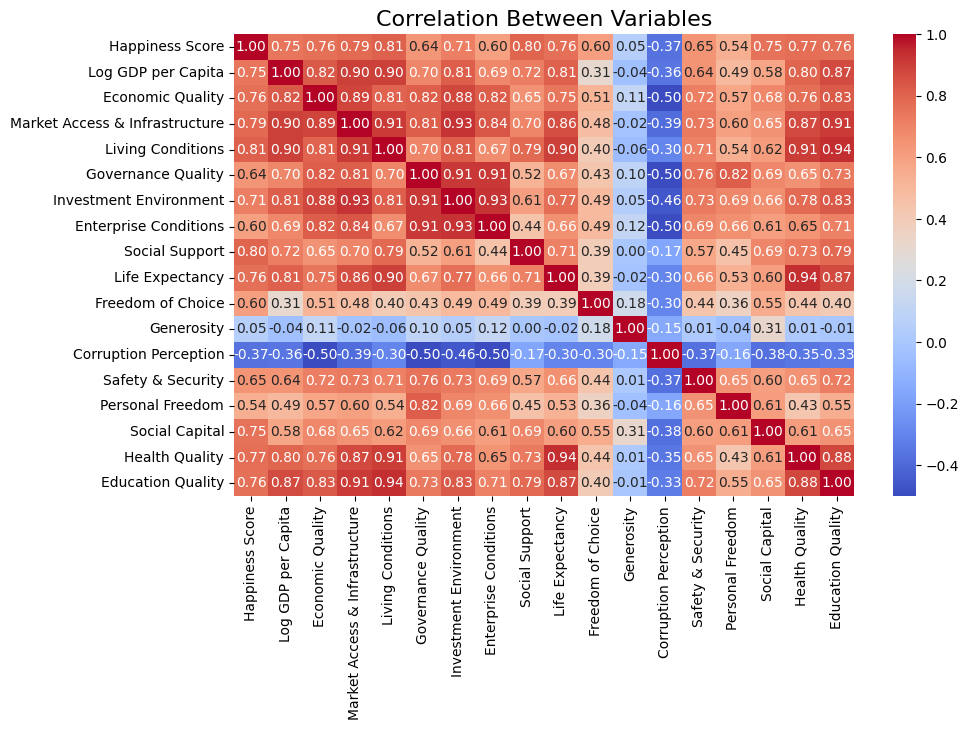

In [12]:
# Calculate the correlation coefficients between variables
correlation_matrix = final_dataset[['Happiness Score',
    'Log GDP per Capita',
    'Economic Quality',
    'Market Access & Infrastructure',
    'Living Conditions',
    'Governance Quality',
    'Investment Environment',
    'Enterprise Conditions',
    'Social Support',
    'Life Expectancy',
    'Freedom of Choice',
    'Generosity',
    'Corruption Perception',
    'Safety & Security',
    'Personal Freedom',
    'Social Capital',
    'Health Quality',
    'Education Quality',]].corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Between Variables', fontsize=16)
plt.show()

This correlation matrix in the form of a heatmap reveals the correlations/relationships between the happiness score variable and other variables. For clarity, the first seven variables after the happiness score represent economic factors and the remaining variables are classified as social factors.

A key observation is that the strongest positive correlations can be seen with Living conditions (0.81), Social Support (0.80), Market Access & Infrastructure (0.79), Health Quality (0.77), Life Expectancy (0.76), Education Quality (0.76), Log GDP per Capita (0.75), and Social Capital (0.77). These numbers reflect the importance of both strong economic systems and social structures in influencing happiness.

The lowest positive correlations include Generosity (0.05) and Corruption Perception (-0.37). This suggests that Generosity has very little direct impact on happiness scores. The negative correlation with Corruption Perception indicates that higher perceived corruption (worse conditions) is associated with lower happiness, as expected. By taking the absolute value of the correlation (0.37), we can see that the strength of the relationship is moderate, though significantly less influential compared to other variables.

When we calculate the average correlations of the grouped economic factors and social factors,  we find that the average correlation is 0.72 for economic factors and 0.60 for social factors. This indicates that both groups contribute significantly to happiness scores, with economic factors demonstrating a slightly stronger relationship. While this suggests that economic factors influence happiness more, the significant contribution of social factors also highlights the need to look at both areas more in depth.


Additionally, it is important to note that correlation does not imply causation. While these correlation coefficients show relationships between these variables and happiness scores, they do not confirm that these variables directly cause changes in happiness levels. Other underlying factors or interactions are likely influencing both the variables and happiness. However, these results are valuable for identifying patterns and associations, prioritizing areas for deeper analysis, and understanding which variables hold the greatest potential to impact happiness.

Below, we look at the distribution of happiness scores across countries/regions using a choropleth map, color-coded according to the scores (warmer colors with a higher score and cooler colors with a lower score). By visualizing the data in this format, we can easily identify areas with higher or lower happiness scores, guiding further analysis into the social and economic factors that may influence these differences.

In [13]:
# Choropleth map to display Happiness Score for each country
# Warmer colors for high happiness score, cooler colors for low happiness score
# Blank spots for countries not included in data
fig = px.choropleth(
    final_dataset,
    locations="Country",
    locationmode="country names",
    color="Happiness Score",
    hover_name="Country",
    title="Happiness Score by Country",
    color_continuous_scale=px.colors.sequential.Plasma
)

fig.update_layout(
    title_font_size=20,
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

From this map, we can observe that warmer colors (or higher happiness scores) are concentrated in regions like North America, Western Europe, Australia, and parts of Asia. These are areas that are often known to have strong economic and social systems. Many countries in Africa and parts of Southern Asia have cooler colors, reflecting lower happiness scores. This may be due to unique social or economic conditions or systemic challenges. There are some outliers, where a country shows different a trend than those in their region. For example, Saudi Arabia and Oman have moderately higher scores than surrounding countries in Western Asia, likely reflecting the influence of specific social or economic factors that may not be as prevalent in neighboring countries.

Below, we have the code for another choropleth map, this time visualizing the Log GDP per Capita by country. We chose to look at this variable more in depth because GDP per capita is a common metric used to measure economic prosperity and is a good general representation of economic conditions. Using this map, we can identify regional trends in GDP per capita and also compare it to the map above to explore how economic conditions align with happiness scores across different regions.

In [14]:
# Choropleth map to display GDP for each country
# Warmer colors for high GDP, cooler colors for low GDP
# Blank spots for countries not included in data

fig = px.choropleth(
    final_dataset,
    locations="Country",
    locationmode="country names",
    color="Log GDP per Capita",
    hover_name="Country",
    title="Log GDP per Capita by Country",
    color_continuous_scale=px.colors.sequential.Plasma
)

fig.update_layout(
    title_font_size=20,
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

We can see with this map that similar to happiness scores, higher GDP values are concentrated in regions like North America, Western Europe, and parts of Asia. Conversely, many countries in Africa and parts of Southern Asia have cooler colors, reflecting lower GDP levels. This overlap strengthens the evidence of a relationship between economic prosperity and happiness, as regions with stronger economies tend to also have higher happiness scores. However, there are still outliters in this case. For example, Venezuela has a high happiness score but low GDP and Egypt has a low happiness score despite high GDP. The differences and outliers in these maps emphasize how other factors, beyond GDP, also influence happiness levels and challenges the notion that economic wealth alone determines happiness.

Below is a series of scatterplots, each showing the relationship between happiness score and a key factor. The key factors used here include 4 of the economic factors and 4 of the social factors with the highest correlation coefficients to happiness score. Each plot includes a regression line to help represent the strength and direction of the trend between the variables. By looking at these scatterplots side by side, we can compare these relationships and observe how each factor may be associated with happiness.

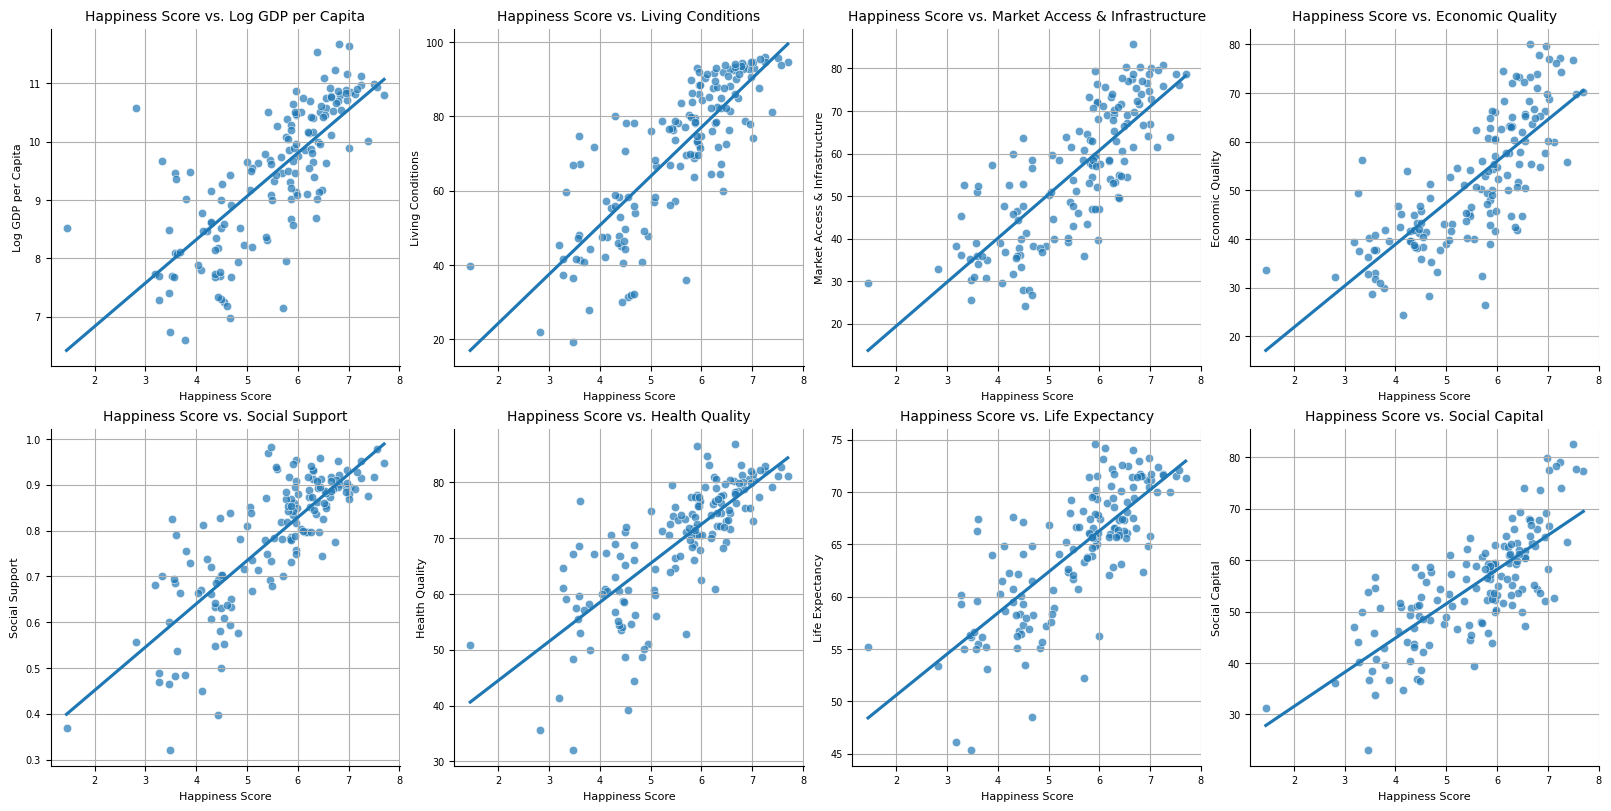

In [15]:
# Key variables to plot
factors = [
    'Log GDP per Capita', 'Living Conditions',
    'Market Access & Infrastructure', 'Economic Quality',
    'Social Support', 'Health Quality',
    'Life Expectancy', 'Social Capital'
]

# Create the grid figure to fit the 8 scatterplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8), constrained_layout=True)

# Flatten for iterations
axes = axes.flatten()

# Loop through each factor and create a scatterplot with a regression line
for i, factor in enumerate(factors):
    ax = axes[i]
    sns.scatterplot(data=final_dataset, x='Happiness Score', y=factor, alpha=0.7, ax=ax)
    sns.regplot(data=final_dataset, x='Happiness Score', y=factor, scatter=False, ci=None, ax=ax)
    ax.set_title(f'Happiness Score vs. {factor}', fontsize=10)
    ax.set_xlabel('Happiness Score', fontsize=8)
    ax.set_ylabel(factor, fontsize=8)
    ax.tick_params(axis='both', labelsize=7)
    ax.grid(True)
    ax.spines[['top', 'right']].set_visible(False)
plt.show()


As expected, the main observation from this visualization is that key factors show clear upward/positive relationships with happiness score. By analyzing the steepness of the regression lines and the clustering of data points around the lines, we can identify the strongest relationships here. The strongest associations align with the correlation coefficients mentioned earlier, with living conditions and social support showing slightly more prevalent positive trends. While these two variables show the most influence based on our current evidence, all of the factors presented demonstrate the potential to significantly impact happiness levels. In general, our evidence so far suggests that economic factors have a slight edge in their influence on happiness scores, but it also highlights the importance of balancing both economic and social factors to gain a more comprehensive understanding of what contributes to happiness.

Below, we have the code for a bar chart illustrating average happiness scores of sub-regions, with color-coded bars based on broader regions. This visualization gives insight into how happiness scores can vary at a sub-regional level and highlights the differences within broader regions. We can use this chart to observe which sub-regions contribute the most or least to their respective regions' overall happiness.

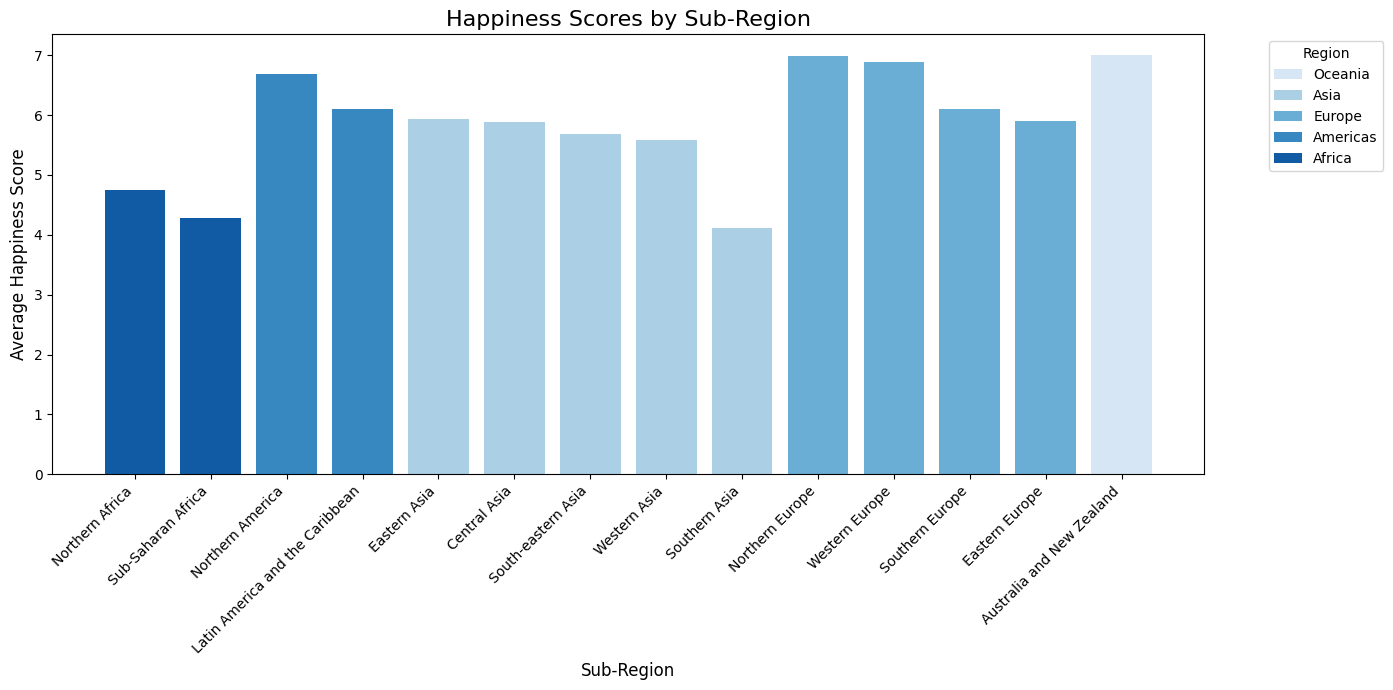

In [16]:
# Group data by Sub-Region and Region and calculate the mean happiness score
grouped_data = final_dataset.groupby(['Sub-Region', 'Region'])['Happiness Score'].mean().reset_index()

# Use color palette to differentiate regions by shades of blue
unique_regions = grouped_data['Region'].unique()
region_colors = sns.color_palette("Blues", len(unique_regions))
region_color_map = {region: region_colors[i] for i, region in enumerate(unique_regions)}

# Assign colors to each sub-region based on its region
grouped_data['Color'] = grouped_data['Region'].map(region_color_map)

# Sort by region and happiness score
grouped_data = grouped_data.sort_values(by=['Region', 'Happiness Score'], ascending=[True, False])

plt.figure(figsize=(14, 7))
plt.bar(
    grouped_data['Sub-Region'],
    grouped_data['Happiness Score'],
    color=grouped_data['Color']
)

plt.title('Happiness Scores by Sub-Region', fontsize=16)
plt.xlabel('Sub-Region', fontsize=12)
plt.ylabel('Average Happiness Score', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Legend
for region, color in region_color_map.items():
    plt.bar(0, 0, color=color, label=region)  # Dummy bars for the legend
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

From this chart, we can see that there are some significant differences in average happiness scores across sub-regions. Sub-regions in Europe show the highest average happiness scores, driven mainly by Northern and Western Europe. Southern Asia has a significantly lower average happiness score when compared to other Asian sub-regions, indicating potential disparities in economic and/or social factors within the region. The Americas show Northern America with a higher happiness score than Latin America and the Caribbean. Both Northern Africa and Sub-Saharan Africa have lower average happiness scores when compared to other regions, highlighting challenges in these areas. Austrailia and New Zealand represent one sub-region and region, showing a high happiness score that is comparable to Europe's  sub-regions with the highest happiness scores. This chart demonstrates the variation in happiness scores within regions and pinpoints which sub-regions most contribute to regional happiness scores, providing direction for deeper analysis into factors causing these differences.

## **Model**

### **Plan**

For our model plan, we decided to use linear regression to predict happiness scores based on key economic and social factors. We chose a linear regression model because it works well for continuous data and helps show how each factor impacts happiness in a simple, easily interpretable manner. We will analyze correlations between these factors and happiness scores to identify the strongest predictors. We will train a regression model with happiness scores as the dependent variable and factors like GDP per capita, Social Support, and Life Expectancy as independent variables. The model will be evaluated using metrics such as MSE, RMSE, and MAE, and we will apply k-fold cross-validation. This approach will help quantify the impact of various factors on happiness.

### **Building**

We began to build our linear regression model by ensuring that the dataset was clean and removing rows with missing values to prevent issues during model training. We categorized the independent variables into two groups representing their classifications of economic factors and social factors.

In [17]:
# Ensure no missing values in dataset that would impact model training or evaluation
final_dataset = final_dataset.dropna()

# Categorize features with the economic and social variables (independent variables)
economic_factors = [
    'Log GDP per Capita', 'Economic Quality', 'Market Access & Infrastructure',
    'Living Conditions', 'Governance Quality', 'Investment Environment', 'Enterprise Conditions'
]
social_factors = [
    'Social Support', 'Life Expectancy', 'Freedom of Choice', 'Generosity',
    'Corruption Perception', 'Safety & Security', 'Personal Freedom',
    'Social Capital', 'Health Quality', 'Education Quality'
]

# Set happiness score as the target variable (dependent variable)
features = economic_factors + social_factors
target = 'Happiness Score'


X = final_dataset[features]
y = final_dataset[target]

### **Training**
We trained the linear regression model on the training dataset. Using the testing dataset, we made predictions and calculated different metrics to evaluate the model. The results suggest that the model predicts happiness scores with a reasonable level of accuracy, especially given the complexity of the factors.

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions for the testing set using the trained model
y_pred = model.predict(X_test)

### **Evaluation and Validation**

In [19]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 0.3535765849703556
MSE: 0.26615996312023993
RMSE: 0.5159069326150211


The scatterplot below shows the actual happiness scores compared to the predicted scores from our linear regression model. The red dashed line represents a perfect match between predictions and actual values. Most points cluster around the line, showing that the model captures the relationship between economic and social factors and happiness scores well. However, some points spread further around the line suggests that other factors or variability may not be accounted for.

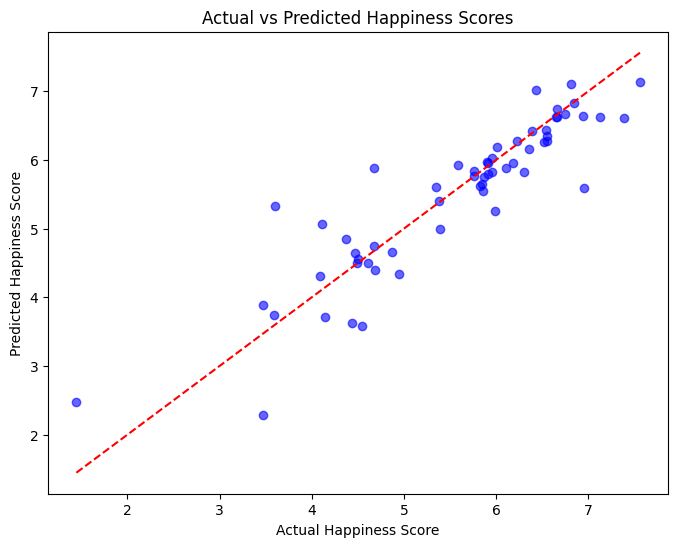

In [20]:
# Create a scatter plot for actual vs predicted happiness scores
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs Predicted Happiness Scores')
plt.show()

To further validate the model, we performed 5-fold cross-validation. The results below show slightly higher numbers than the test set metrics, indicating that the model is performing well with variability and there is no overfitting.

In [21]:
# Cross-validation
y_tot_pred = cross_val_predict(model, X, y, cv=5)
cross_mae = mean_absolute_error(y, y_tot_pred)
cross_mse = mean_squared_error(y, y_tot_pred)
cross_rmse = np.sqrt(cross_mse)

print(f"MAE: {cross_mae}")
print(f"MSE: {cross_mse}")
print(f"RMSE: {cross_rmse}")

MAE: 0.4075753736780066
MSE: 0.2889999160629487
RMSE: 0.5375871241603064


The scatterplot belows shows the plotted results of cross-validation, comparing actual happiness scores to predicted scores in the same way as the previous visualization. The results are similar, with predictions closely aligning with actual values and showing strong model performance. These results further validate the reliability of the model in predicting happiness scores based on our selected factors. However, there is still some spread around the line, suggesting variability or additional factors that could be explored.

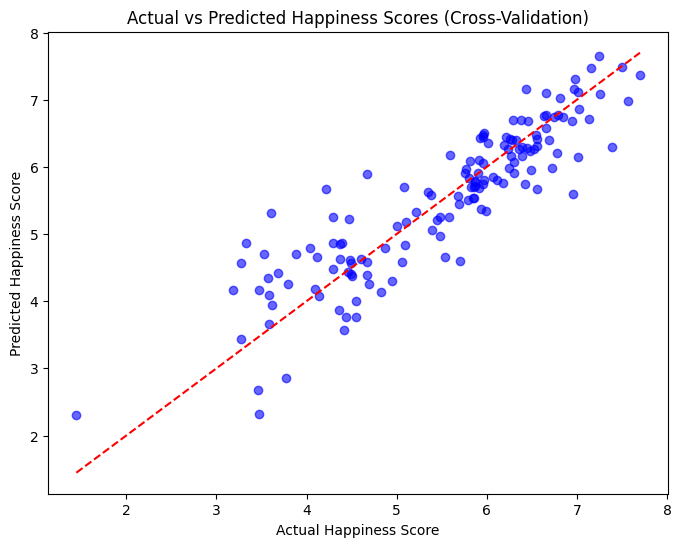

In [22]:
# Scatter plot for cross-validation results
plt.figure(figsize=(8, 6))
plt.scatter(y, y_tot_pred, c='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs Predicted Happiness Scores (Cross-Validation)')
plt.show()

### **Linear Regression Coefficients**
The model coefficients that we extracted provided insights into the relative importance of each factor to happiness scores. Some key positive coefficients include Freedom of Choice (2.10), Social Support (1.83), and Log GDP per Capita (0.16), indicating that these factors significantly contribute to increasing happiness levels. Some notable negative coefficients include Corruption Perception (-0.82), Governance Quality (-0.008), and Education Quality (-0.015), suggesting that higher perceived corruption and certain governance and education metrics are associated with lower happiness scores.

In [23]:
# Display the coefficients of the linear regression model
coefficients = pd.DataFrame(zip(X.columns, model.coef_), columns=['Variable', 'Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
print(coefficients)

                          Variable  Coefficient
9                Freedom of Choice     2.104825
7                   Social Support     1.835009
0               Log GDP per Capita     0.162109
8                  Life Expectancy     0.028353
3                Living Conditions     0.022627
14                  Social Capital     0.021851
13                Personal Freedom     0.012409
2   Market Access & Infrastructure     0.011457
10                      Generosity     0.010796
15                  Health Quality     0.007408
1                 Economic Quality     0.006065
6            Enterprise Conditions     0.002880
12               Safety & Security    -0.005462
4               Governance Quality    -0.008039
16               Education Quality    -0.015303
5           Investment Environment    -0.023437
11           Corruption Perception    -0.819859


The bar chart below visualizes the coefficients from the linear regression model, showing the contributions of economic and social factors in predicting happiness scores. The chart provides a clear comparison of the strength and direction of each variable's influence and helps point out priority areas for improving happiness globally.

<ipython-input-24-d39fa46855d4>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




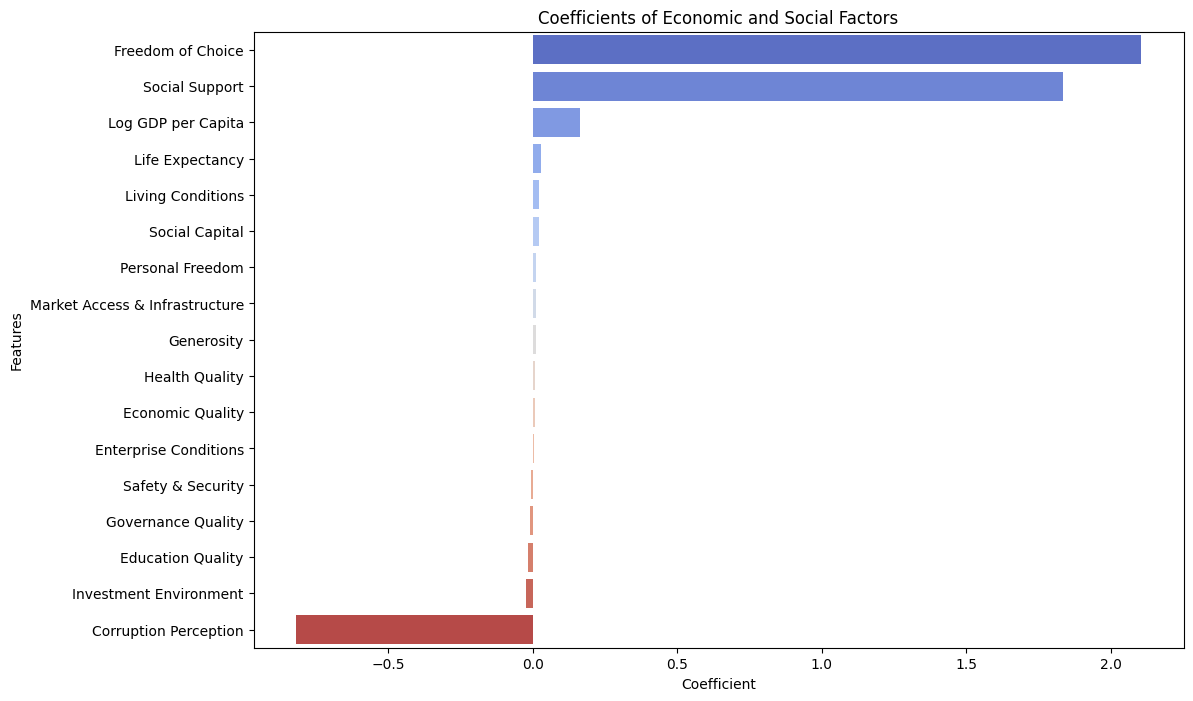

In [24]:
# Sorting coefficients
coefficients = pd.DataFrame(zip(X.columns, model.coef_), columns=['Variable', 'Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)

# Bar plot because negative values present
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Variable', data=coefficients, palette='coolwarm')
plt.title('Coefficients of Economic and Social Factors')
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.show()

### **Conclusions**


To conclude, our analysis provided valuable insights into the factors that contribute to global happiness. Through our model, we identified key contributors to happiness scores, with Freedom of Choice and Social Support (social factors) and Log GDP per Capita (an economic factor) revealed as the strongest positive influences. While the regression model highlights the importance of social factors, our EDA showed that economic factors, such as Living Conditions and Market Access & Infrastructure, exhibited stronger overall correlations with happiness scores. This suggests that while social factors may have stronger individual impacts in the model, the combined influence of economic factors may be slightly more significant. It is evident that both social and economic factors are essential to increasing happiness levels and there should be a balanced approach to improving economic stabilty and social well-being.

Performance-wise, our linear regression model demonstrated strong predictive capabilities, as seen in the scatterplots comparing actual and predicted happiness scores. Cross-validation further confirmed our it's reliability, showing consistent performance with more varaibility. While most predictions aligned closely with actual values, there was still spread around the regression line that highlights potential additional factors that should be considered in future analyses.

To address our hypothesis, our findings partially align. Both social and economic factors showed significant contributions to happiness, as seen by the model and our EDA. However, when it comes to predictive power, the regression model revealed that social factors, particularly Freedom of Choice and Social Support, had the strongest individual predictive power, while the economic factor Log GDP per Capita also ranked highly. This suggests that economic factors may collectively have a stronger influence on happiness (as shown in the EDA), certain social factors may play a more direct role in predicting individual happiness scores.

In the future, if given more time, we would explore more diverse variables, such as environmental and cultural factors, to provide an even more comprehensive analysis of happiness. Advanced models like random forests or neural networks might be beneficial and better at capturing some of the more complex relationships. Looking at how the different factors besides happiness score influence eachother could also be useful to understand what dynamics and combinations of different factors result in high happiness levels. Additionally, analyzing regional trends more in depth would be useful to look into how happiness varies within regions and what factors account for regional disparities.

In [25]:
%%shell
jupyter nbconvert --to html '/content/drive/My Drive/DataScienceProject/DataScience_FinalTutorial.ipynb'

[NbConvertApp] Converting notebook /content/drive/My Drive/DataScienceProject/DataScience_FinalTutorial.ipynb to html
[NbConvertApp] Writing 374820 bytes to /content/drive/My Drive/DataScienceProject/DataScience_FinalTutorial.html
